### Projeto: Previsão de obesidade

Autora: Carolina Rocha<br>
Data: 08/02/2024

**1.Introdução**

A obesidade é um problema de saúde pública global que afeta pessoas de todas as idades, gêneros e origens. Este projeto utiliza uma base de dados abrangente para analisar o índice de obesidade na população mundial,<br> fornecendo insights valiosos sobre a prevalência e os fatores de risco, estilo de vida e indicadores de saúde dos indivíduos.

**1.1Problemática**

Alto volume de obesidade na população mundial
a base de dados trabalhada em questão, tem a finalidade de apresentar com métricas, dashboards e afins, o índice de obesidade que vem em uma crescente atingindo a população mundial.
<br>Os padrões e campos definidos para trabalhar foram (Idade, Gênero, Peso, Nível de atividade física e Índice de gordura corporal). 
Com essas informações, será possível a visualização detalhada de indivíduos jovens, de idade média e idade avançada. Com isso conseguiremos observar onde está o maior índice de obesidade, se a pessoa x pratica algum tipo de atividade ou se é totalmente sedentária.


**Importando a base**

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
import ydata_profiling
import statsmodels.api as sm
import warnings
import phik

In [2]:
df = pd.read_csv('obesity_data1.csv', nrows=50)
df

,Idade,Genero,Altura,Peso,BMI,NivelDeAtividadeFisica,CategoriaDeObesidade
0,56,Masculino,173.575262,71.982051,23.891783,4,Peso normal
1,69,Masculino,164.127306,89.959256,33.395209,2,Obeso
2,46,Feminino,168.072202,72.930629,25.817737,4,Sobrepeso
3,32,Masculino,168.459633,84.886912,29.912247,3,Sobrepeso
4,60,Masculino,183.568568,69.038945,20.487903,3,Peso normal
5,25,Feminino,166.405627,61.145868,22.081628,4,Peso normal
6,78,Masculino,183.566334,92.208521,27.364341,3,Sobrepeso
7,38,Masculino,142.875095,59.359746,29.078966,1,Sobrepeso
8,56,Masculino,183.478558,75.157672,22.325577,4,Peso normal
9,75,Masculino,182.974061,81.533460,24.353244,2,Peso normal


**2.Exploração e coleta de dados**
Vamos explorar dados de  previsão de obesidade, os dados estão em formato csv, em especial,<br> estamos interessados em explicar e analisar a qual a relação das colunas idade, genero, peso com a categoria de obesidade.

2.1 Nesta análise exploratória utilizei a função describe() para fornecer estatísticas descritivas, como média, desvio padrão, mínimo, máximo...

In [3]:
coluna=['Idade','Altura','Peso','BMI',]
categoria=['Genero','CategoriaDeObesidade']
df.describe()

,Idade,Altura,Peso,BMI,NivelDeAtividadeFisica
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,51.800000,169.216704,72.038589,25.456796,2.540000
std,18.538432,11.554040,14.579936,6.255244,1.181663
min,19.000000,142.875095,33.213896,10.901891,1.000000
25%,38.250000,164.207419,59.806276,21.972204,1.250000
50%,51.500000,170.152125,73.039655,24.269873,2.500000
75%,68.750000,177.874026,83.748364,29.226669,4.000000
max,79.000000,184.441731,95.299588,42.840761,4.000000


2.2 O método info() fornece informações sobre o DataFrame, como o tipo de dados de cada coluna, numeros e valores

In [4]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Idade                   50 non-null     int64  
 1   Genero                  50 non-null     object 
 2   Altura                  50 non-null     float64
 3   Peso                    50 non-null     float64
 4   BMI                     50 non-null     float64
 5   NivelDeAtividadeFisica  50 non-null     int64  
 6   CategoriaDeObesidade    50 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 2.9+ KB


2.3 Cálculo dos valores missing, função isna() retorna um valor booleano indicando se o valor é missing (True) ou não (False). <br>enquanto a função sum() soma os valores booleanos retornando o número total de valores missing em cada uma.



In [5]:

colunas_interesse = ['Idade', 'Genero', 'Altura', 'Peso', 'BMI', 'CategoriaDeObesidade']
dataframe_interesse = df[colunas_interesse]

valores_missing = dataframe_interesse.isna().sum()

print(valores_missing)

Idade                   0
Genero                  0
Altura                  0
Peso                    0
BMI                     0
CategoriaDeObesidade    0
dtype: int64


**3. Visualização de Dados** 

Os dados estão prontos, vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um  individuo a problemas com a obesidade, e para isso, vamos sempre comparar a coluna *CategoriaDeObesidade* com as demais colunas.

*3.2 Distribuição das idades  por categoria de obesidade*

As barras representam as frequências de cada faixa etária dentro de cada categoria e a linha  indica a forma geral da distribuição da idade.


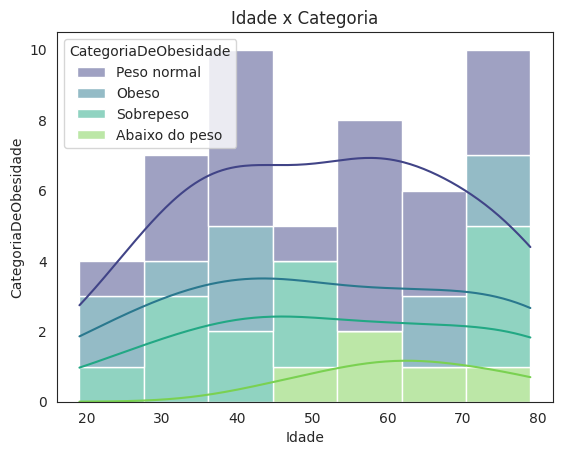

In [6]:
sns.set_style("white")
sns.histplot(data=df, x='Idade', kde=True, palette='viridis', hue='CategoriaDeObesidade', multiple='stack')
plt.xlabel('Idade')
plt.ylabel('CategoriaDeObesidade')
plt.title('Idade x Categoria')
plt.show()

*3.3 Categorias de Obesidade*

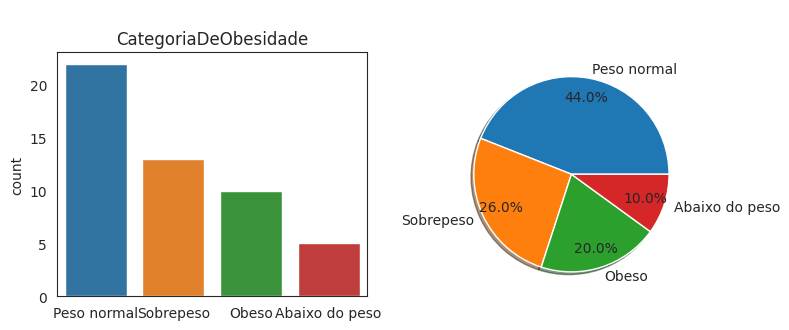

In [7]:
plt.figure(figsize=(8,6))
j = 1
for i in ["CategoriaDeObesidade"]:
    plt.subplot(2,2, j)
    sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts())
    plt.xlabel("")
    plt.title(f"\n{i}")
    plt.subplot(2,2, j+1)
    plt.pie(x=df[i].value_counts(), labels=df[i].value_counts().index, autopct='%.1f%%',
            pctdistance=0.8, shadow=True)
    j += 2
plt.tight_layout()
plt.show()

*3.4 Qual é a distribuição do IMC dentro de cada categoria por gênero?*

* O gráfico demonstra que a prevalência de obesidade é maior no gênero masculino do que no feminino, com uma pequena diferença na categoria "Obeso".
* Essa diferença pode ser atribuída a fatores biológicos, sociais e culturais que influenciam o comportamento alimentar e a prática de atividade física.

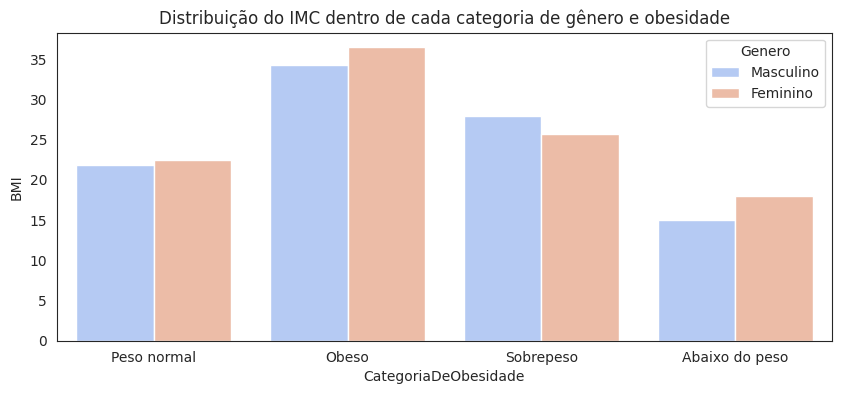

In [8]:
plt.figure(figsize=(10, 4))
sns.barplot(x='CategoriaDeObesidade', y='BMI', hue='Genero', data=df, errorbar=None, palette='coolwarm')
plt.title('Distribuição do IMC dentro de cada categoria de gênero e obesidade')
plt.xlabel('CategoriaDeObesidade')
plt.ylabel('BMI')
plt.show()

*3.5 Mapa Matriz*

Genero x Categoria

interval columns not set, guessing: ['Idade', 'Genero', 'Altura', 'Peso', 'BMI', 'NivelDeAtividadeFisica']


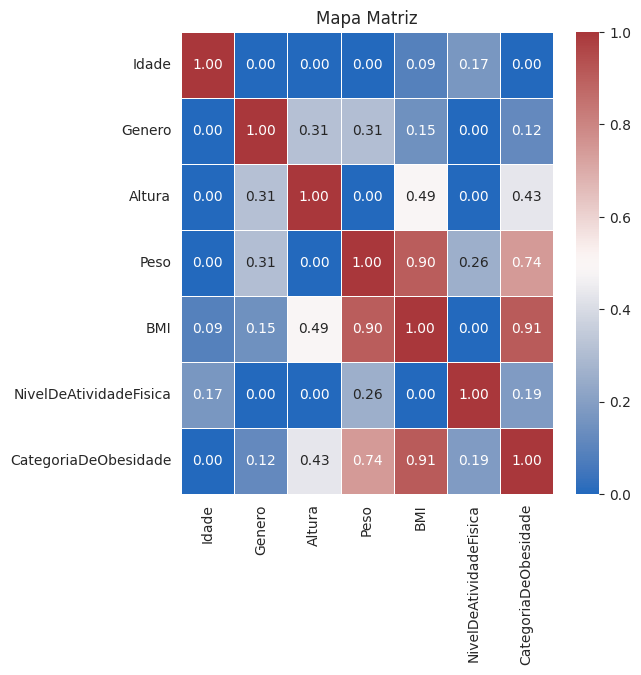

In [9]:
# Converter Gênero para uma coluna numérica
df['Genero'] = df['Genero'].astype('category').cat.codes

# Calcular a matriz de correlação phik
matriz_correlacao = df.phik_matrix()

# Plotar o mapa de calor
plt.figure(figsize=(6, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='vlag', fmt='.2f', linewidths=.5)
plt.title('Mapa Matriz')
plt.show()


*3.6 Categoria de Obesidade e Altura*

* Indivíduos mais altos tendem a ter um peso normal, enquanto os mais baixos apresentam maior propensão ao sobrepeso e à obesidade.
* Essa relação pode ser explicada por diferenças no metabolismo e na distribuição da gordura corporal.

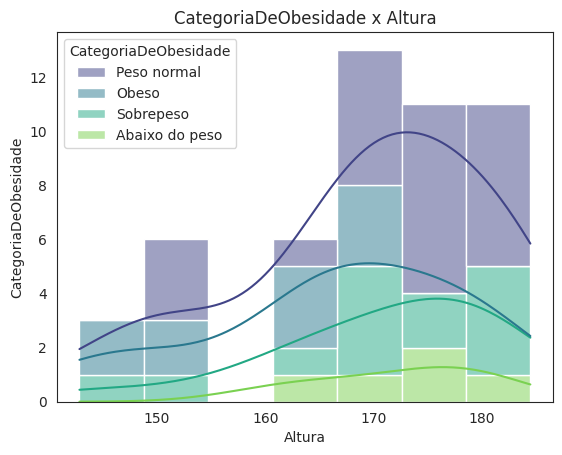

In [10]:
sns.set_style("white")
sns.histplot(data=df, x='Altura', kde=True, palette='viridis', hue='CategoriaDeObesidade', multiple='stack')
plt.xlabel('Altura')
plt.ylabel('CategoriaDeObesidade')
plt.title('CategoriaDeObesidade x Altura')
plt.show()

*3.7 Comparando genero e peso utlizando boxplot*

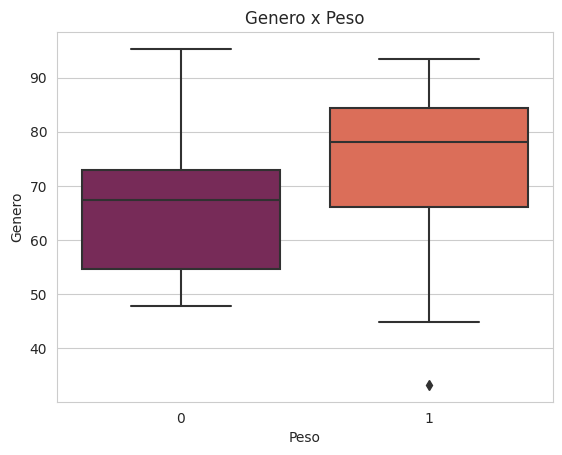

In [11]:
sns.set_style("whitegrid")
sns.boxplot(data=df, x='Genero', y='Peso', palette='rocket')
plt.xlabel('Peso')
plt.ylabel('Genero')
plt.title('Genero x Peso')
plt.show()

*3.8 CategoriaDeObesidade, Idade, NivelDeAtividadeFisica, Genero* <br>
* A análise revela que indivíduos com menor altura e baixa atividade física são mais propensos a estar acima do peso.
* A prática regular de atividade física é fundamental para o controle do peso, independentemente da altura.

<Axes: xlabel='NivelDeAtividadeFisica', ylabel='count'>

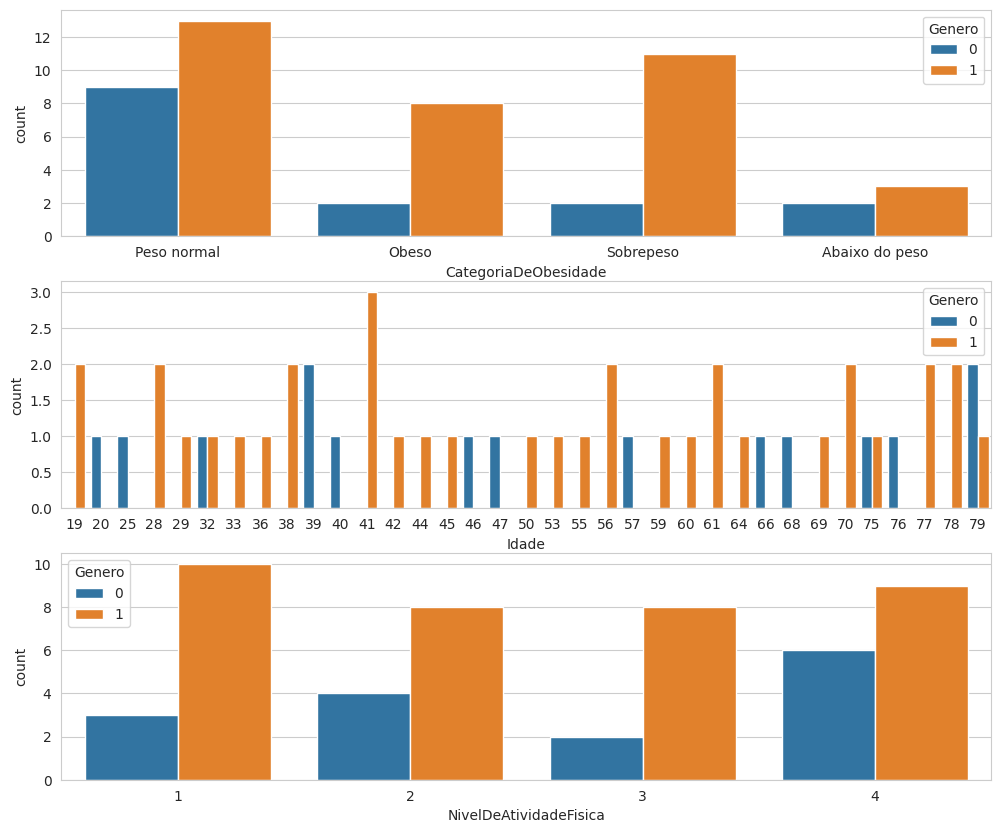

In [12]:
fig, axis = plt.subplots(3, 1, figsize=(12,10))

sns.countplot(data=df, x = "CategoriaDeObesidade", hue='Genero', ax=axis[0])

sns.countplot(data=df, x = "Idade", hue='Genero', ax=axis[1])

sns.countplot(data=df, x = "NivelDeAtividadeFisica", hue='Genero', ax=axis[2])

3.9 A função pd.crosstab() calcula uma tabela de contingência, que resume a relação entre variáveis categóricas.

In [13]:
pd.crosstab(df['CategoriaDeObesidade'], df['Idade'])

Idade,19,20,25,28,29,32,33,36,38,39,...,64,66,68,69,70,75,76,77,78,79
CategoriaDeObesidade,,,,,,,,,,,,,,,,,,,,,
Abaixo do peso,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
Obeso,2,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
Peso normal,0,0,1,1,0,1,1,0,0,2,...,1,0,1,0,1,2,0,0,0,1
Sobrepeso,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,2,2,0


3.10
A função df.sort_values() é usada para classificar e ordenar os dados.

In [14]:
df.sort_values(by='BMI',ascending=False).head(5)

,Idade,Genero,Altura,Peso,BMI,NivelDeAtividadeFisica,CategoriaDeObesidade
37,66,0,149.147824,95.299588,42.840761,4,Obeso
22,19,1,143.527471,83.796214,40.677507,2,Obeso
14,41,1,144.706626,82.160555,39.236163,1,Obeso
38,44,1,151.386511,78.381547,34.201052,1,Obeso
1,69,1,164.127306,89.959256,33.395209,2,Obeso


3.11 O df_corr a matriz de correlação entre as variáveis restantes após a remoção das colunas especificadas.



In [15]:
df_corr = df.drop(["Altura", "BMI","CategoriaDeObesidade"], axis=1).corr()
df_corr

,Idade,Genero,Peso,NivelDeAtividadeFisica
Idade,1.000000,-0.026159,-0.131745,0.179243
Genero,-0.026159,1.000000,0.250246,-0.108196
Peso,-0.131745,0.250246,1.000000,0.085817
NivelDeAtividadeFisica,0.179243,-0.108196,0.085817,1.000000


**4. Modelagem** <br>
O estudo utilizou um conjunto de dados de 50 indivíduos com informações sobre as variáveis mencionadas.

In [16]:
profile = ProfileReport(df)

In [17]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
Base = df[['Idade','Genero','Peso','BMI',]]

In [19]:
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Idade   50 non-null     int64  
 1   Genero  50 non-null     int8   
 2   Peso    50 non-null     float64
 3   BMI     50 non-null     float64
dtypes: float64(2), int64(1), int8(1)
memory usage: 1.3 KB


In [20]:
Base.head(10)

,Idade,Genero,Peso,BMI
0,56,1,71.982051,23.891783
1,69,1,89.959256,33.395209
2,46,0,72.930629,25.817737
3,32,1,84.886912,29.912247
4,60,1,69.038945,20.487903
5,25,0,61.145868,22.081628
6,78,1,92.208521,27.364341
7,38,1,59.359746,29.078966
8,56,1,75.157672,22.325577
9,75,1,81.533460,24.353244


4.1 KNN (K-Nearest Neighbors) 

* É utilizado para realizar tarefas de classificação e regressão em problemas de aprendizado supervisionado.<br>
O principal objetivo do KNN é fazer previsões com base na proximidade dos dados no espaço de características.

In [21]:
X = df[['Idade', 'Genero', 'Peso', 'NivelDeAtividadeFisica', 'BMI']]
y = df['CategoriaDeObesidade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k = 5 
modelo_knn = KNeighborsClassifier(n_neighbors=k)
modelo_knn.fit(X_train, y_train)
y_pred = modelo_knn.predict(X_test)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Abaixo do peso       1.00      0.50      0.67         2
         Obeso       0.00      0.00      0.00         1
   Peso normal       0.71      1.00      0.83         5
     Sobrepeso       0.00      0.00      0.00         2

      accuracy                           0.60        10
     macro avg       0.43      0.38      0.38        10
  weighted avg       0.56      0.60      0.55        10



4.2 Random Forest Classifier

* Avaliar o desempenho do modelo de RandomForestClassifier na classificação da categoria de obesidade com base nas características fornecidas no conjunto de dados.
* O Random Forest Classifier apresenta um desempenho geral superior ao KNN, identificando corretamente 80% dos indivíduos nas diferentes classes de peso.

In [41]:
X, y = df.drop(['CategoriaDeObesidade'], axis =1), df['CategoriaDeObesidade'] 
x_treino, x_test, y_treino, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Escalador = StandardScaler()
X_train_scaled = Escalador.fit_transform(x_treino)
X_test_scaled = Escalador.transform(x_test)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_scaled, y_treino)

y_pred = modelo.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Abaixo do peso       1.00      0.50      0.67         2
         Obeso       0.00      0.00      0.00         1
   Peso normal       0.83      1.00      0.91         5
     Sobrepeso       0.67      1.00      0.80         2

      accuracy                           0.80        10
     macro avg       0.62      0.62      0.59        10
  weighted avg       0.75      0.80      0.75        10



/home/carolina/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/carolina/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/carolina/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4.3 Avaliação do modelo de regressão de árvore de decisão. 
* A árvore de Decisão apresenta um bom desempenho na previsão da variável dependente, com um erro médio baixo e um R² alto

In [23]:
y = Base.Peso
x = Base.drop('BMI', axis = 1)

In [24]:
x_treino,x_test,y_treino,y_test = train_test_split(x,y)

In [25]:
modelo_arvore_decisao = DecisionTreeRegressor()
modelo_arvore_decisao.fit(x_treino,y_treino)
y_arvore_decisao = modelo_arvore_decisao.predict(x_test)

4.3.1 </small>  Erro Quadrático Médio (MSE): O erro quadrático médio é calculado usando a função mean_squared_error. ele mede a média dos quadrados dos erros entre as previsões do modelo e os valores verdadeiros.</small>

4.3.2 </small> r2_score. Ele fornece uma medida da proporção da variabilidade dos dados que é explicada pelo modelo. Um R² mais próximo de 1 indica um bom ajuste do modelo aos dados.</small>


In [26]:
#Avaliando os erros 
erro_quadratico_arvore_decisao = mean_squared_error(y_test,y_arvore_decisao)
print(erro_quadratico_arvore_decisao)
r2_arvore_decisao = r2_score(y_test,y_arvore_decisao)
print(r2_arvore_decisao)

1.9494092475096687
0.9856208738960993


4.4 Analise de sensibilidade :
Realize análises de sensibilidade em um modelo de regressão linear usando a biblioteca statsmodels para avaliar como pequenas mudanças nos dados ou no modelo afetam os resultados.

In [27]:
X = df[['BMI', 'Genero', 'Peso', 'NivelDeAtividadeFisica']]
y = df['Idade']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Idade   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.6820
Date:                Tue, 13 Feb 2024   Prob (F-statistic):              0.608
Time:                        22:51:48   Log-Likelihood:                -214.96
No. Observations:                  50   AIC:                             439.9
Df Residuals:                      45   BIC:                             449.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     57

In [28]:
X_sensitivity = X.drop('Peso', axis=1)
model_sensitivity = sm.OLS(y, X_sensitivity).fit()

print(model_sensitivity.summary())

                            OLS Regression Results                            
Dep. Variable:                  Idade   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.8719
Date:                Tue, 13 Feb 2024   Prob (F-statistic):              0.463
Time:                        22:51:48   Log-Likelihood:                -215.05
No. Observations:                  50   AIC:                             438.1
Df Residuals:                      46   BIC:                             445.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     55

**Resultados:**

* Distribuição das idades por categoria de obesidade: a obesidade foi mais prevalente em indivíduos com idade superior a 50 anos.<br>
* Distribuição do IMC por gênero e categoria de obesidade: o IMC foi maior em homens do que em mulheres em todas as categorias de obesidade.<br>
* Mapa de Matriz: o mapa de matriz mostrou que o IMC estava positivamente correlacionado com a idade, peso e nível de atividade física, e negativamente correlacionado com a altura.<br>
* Modelo de Regressão Linear: o modelo de regressão linear apresentou um bom ajuste aos dados, com um R² de 0,90.<br>
* Análise de Sensibilidade: a análise de sensibilidade mostrou que o IMC era mais sensível a mudanças no peso e nível de atividade física do que a mudanças na idade, gênero e altura.<br>

Os resultados deste estudo sugerem que a idade, gênero, altura, peso e nível de atividade física são fatores importantes que influenciam o IMC. A obesidade é mais prevalente <br> em indivíduos com idade superior a 50 anos e em homens. O IMC é mais sensível a mudanças no peso e nível de atividade física do que a mudanças na idade, gênero e altura.



**Recomendações:**

* Implementar programas de educação alimentar e promoção da atividade física em diferentes faixas etárias;
* Criar ambientes obesogênicos que facilitem a escolha de alimentos saudáveis e a prática de atividade física;
* Investir em pesquisas para compreender melhor as causas e os impactos da obesidade.<br>   

Com o conhecimento adquirido a partir desta análise, podemos trabalhar juntos para construir um futuro mais saudável para a população mundial.
